# Week 19 Homework

# Question 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Supervised Learning Models:

Linear Regression: This model fits an equation for a response variable based on an explanatory variable.  It finds the best slope and intercept value to represent the relationship between the two variables linerally.  This method is evaluated using root mean squared error. This is used for continuous numeric response variables. 


Multiple Linear Regression:  Similar to the model above, but it uses mutiple explanatory variables and finds a slope for each variable to best predict the response variable. This is used for continuous numeric response variables. 


Logistic Regression: Logisitic Regression is a model used to predict classes, so the response variable is discrete.  It is used for a binary dependent variable (meaning there are only two choices for the class label). It works by determining the probability of each of the two outcomes using a logistic function and then assigning the prediction class as the more probable outcome. It is evaluted using accuracy, precision, recall.  


Multinomial Logistic Regression: Similar to logistic regression but for datasets with more than two classes to predict. 


KNN (K-Nearest Neighbor Classification):  This is a classifier model for discrete datasets that finds the k closest samples to the datapoint and then assigns the class as that of the majority class of the nearest neighbors, weighted by their distance from the class that we are trying to predict.  This is also evaluated through accuracy, precision and recall. 

SVM (Support Vector Machine): 

Decision Tree Regressor: Decision trees are 


Decision Tree Classifier:


Random Forest Regressor: This is an ensemble of decision trees meaning that it uses multiple decision trees and then takes the average of the output for each regressor decision tree. This is evaluated using rmse. 


Random Forest Classifier: This is an ensemble of decision trees meaning that it uses multiple decision trees and then takes the majority number of votes for the classification trees. This is evaluated using precision, accuracy and recall. 

Gradient Boosting Regressor:


XGBoost:


Neural Network:



Deep Neural Network:





# Question 2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

Unsupervised Learning Models: 

KMeans Clustering:  This clusters data into a specified number of clusters based on the observations features and the mean of each feature's cluster. This can be evaluated by making a scatterplot of important features and seeing how well the data is grouped into distinct clusters.  You can also see if the clusters fit the labels well or not if you know labels for your data. 

Hierarchical Clustering: This clustering method clusters into a hierarchy of clusters, meaning like datapoints are clustered into small clusters which are then clustered into larger clusters, which forms a hierarchy of clusters.  This can be represented with a dendrogram. 

# Question 3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [1]:
#import necessary packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in the dataset from the csv file and convert to a pandas dataframe
df = pd.read_csv('../week_19/customer_data.csv', encoding='unicode_escape')

#look at the head of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
#find out about dataset using .info and .describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#find the number of null values per feature
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

If we are thinking about customer segmentation, we do not need to keep all the features.  The goal is to segment customers into groups based on like characteristics.  Useful features for this are country, customer id (since that will tell us if the same customer purchased multiple items), quantity, unit price, and invoice date.  Description can be removed since it is difficult to encode with has multiple words and likely doesn't help group the customer.  Because we need to know the customer id for grouping any purchases together by the customer, we should remove all rows with null customer id. 

In [5]:
#Drop all rows where null values exist
df.dropna(axis=0, inplace=True)

In [6]:
#drop the Description column
df.drop(['Description'], axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
#Drop StockCode column
df.drop(['StockCode'], axis=1, inplace=True)
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#Drop InvoiceNo column
df.drop(['InvoiceNo'], axis=1, inplace=True)
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
#InvoiceDate is overly complicated for clustering.  You could possibly extract month from the date and then encode the month.  
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%m")
#Since this column is categorical and nominal, we can use base n encoding to encode this column.
import category_encoders as ce
#create an object for the encoding
encoder = ce.BaseNEncoder(cols=['InvoiceDate'],return_df=True,base=5)
# fit and transform the data
df = encoder.fit_transform(df)
#look at the head of the new_df
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Quantity,InvoiceDate_0,InvoiceDate_1,InvoiceDate_2,UnitPrice,CustomerID,Country
0,6,0,0,1,2.55,17850.0,United Kingdom
1,6,0,0,1,3.39,17850.0,United Kingdom
2,8,0,0,1,2.75,17850.0,United Kingdom
3,6,0,0,1,3.39,17850.0,United Kingdom
4,6,0,0,1,3.39,17850.0,United Kingdom


In [10]:
#Country needs to be encoded. This column is categorical and nominal.  First, find out how many different countries are in the dataset.
print(df["Country"].nunique())
#Since there are 37 different countries in the dataset, One Hot encoding would create too many columns and introduce a lot of 0's into the dataset. We can try base N encoding which converts numerical values of a category into a base n value.

#create an object for the encoding
encoder = ce.BaseNEncoder(cols=['Country'],return_df=True,base=5)

# fit and transform the data
df_encoded = encoder.fit_transform(df)

#look at the head of the new_df
df_encoded.head()

37


C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Quantity,InvoiceDate_0,InvoiceDate_1,InvoiceDate_2,UnitPrice,CustomerID,Country_0,Country_1,Country_2,Country_3
0,6,0,0,1,2.55,17850.0,0,0,0,1
1,6,0,0,1,3.39,17850.0,0,0,0,1
2,8,0,0,1,2.75,17850.0,0,0,0,1
3,6,0,0,1,3.39,17850.0,0,0,0,1
4,6,0,0,1,3.39,17850.0,0,0,0,1


In [11]:
df_encoded.describe()

,Quantity,InvoiceDate_0,InvoiceDate_1,InvoiceDate_2,UnitPrice,CustomerID,Country_0,Country_1,Country_2,Country_3
count,406829.000000,406829.0,406829.000000,406829.000000,406829.000000,406829.000000,406829.0,406829.000000,406829.000000,406829.000000
mean,12.061303,0.0,1.104484,1.770614,3.460471,15287.690570,0.0,0.003350,0.117637,1.092093
std,248.693370,0.0,0.810549,1.243019,69.315162,1713.600303,0.0,0.057785,0.468748,0.505823
min,-80995.000000,0.0,0.000000,0.000000,0.000000,12346.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,1.000000,1.250000,13953.000000,0.0,0.000000,0.000000,1.000000
50%,5.000000,0.0,1.000000,2.000000,1.950000,15152.000000,0.0,0.000000,0.000000,1.000000
75%,12.000000,0.0,2.000000,3.000000,3.750000,16791.000000,0.0,0.000000,0.000000,1.000000
max,80995.000000,0.0,2.000000,4.000000,38970.000000,18287.000000,0.0,1.000000,4.000000,4.000000


In [12]:
#Split the dataset into X and Y.  Since we are trying to look for customer segments, CustomerID should be y.
y = df_encoded['CustomerID']
X = df_encoded.drop(['CustomerID'], axis=1)
X.head()

,Quantity,InvoiceDate_0,InvoiceDate_1,InvoiceDate_2,UnitPrice,Country_0,Country_1,Country_2,Country_3
0,6,0,0,1,2.55,0,0,0,1
1,6,0,0,1,3.39,0,0,0,1
2,8,0,0,1,2.75,0,0,0,1
3,6,0,0,1,3.39,0,0,0,1
4,6,0,0,1,3.39,0,0,0,1


In [13]:
X.describe()

,Quantity,InvoiceDate_0,InvoiceDate_1,InvoiceDate_2,UnitPrice,Country_0,Country_1,Country_2,Country_3
count,406829.000000,406829.0,406829.000000,406829.000000,406829.000000,406829.0,406829.000000,406829.000000,406829.000000
mean,12.061303,0.0,1.104484,1.770614,3.460471,0.0,0.003350,0.117637,1.092093
std,248.693370,0.0,0.810549,1.243019,69.315162,0.0,0.057785,0.468748,0.505823
min,-80995.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,1.000000,1.250000,0.0,0.000000,0.000000,1.000000
50%,5.000000,0.0,1.000000,2.000000,1.950000,0.0,0.000000,0.000000,1.000000
75%,12.000000,0.0,2.000000,3.000000,3.750000,0.0,0.000000,0.000000,1.000000
max,80995.000000,0.0,2.000000,4.000000,38970.000000,0.0,1.000000,4.000000,4.000000


In [14]:
#Remove Outliers from the Dataset
# calculate summary statistics
data_mean, data_std = np.mean(X['Quantity']), np.std(X['Quantity'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

count    406641.000000
mean         11.538399
std          30.048816
min        -720.000000
25%           2.000000
50%           5.000000
75%          12.000000
max         756.000000
Name: Quantity, dtype: float64

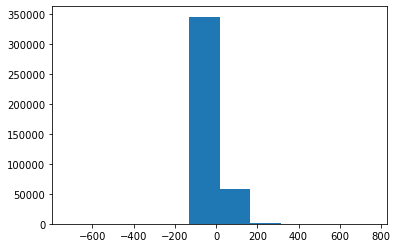

In [28]:
# remove outliers
X = X[(X['Quantity'] > lower) & (X['Quantity'] < upper)]


#Negative quantity represents returned transaction

plt.hist(X['Quantity'])
X['Quantity'].describe()

In [16]:
#Standardize the dataset with the exception of the encoded columns.  This needs to be done because there is a large descrepancy between std for each feature.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Quantity', 'UnitPrice'])
    ], remainder='passthrough')

X_res = ct.fit_transform(X)

# Question 4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

You do not need to look at all the data for clustering.  You can focus on the variables that will help make customer segments.  This information should help you distinguish between like-groups of customers.  I removed some columns from the dataset that were irrelevant to this problem.  I then used inertia to find the ideal number of clusters which looked to be around 4. 

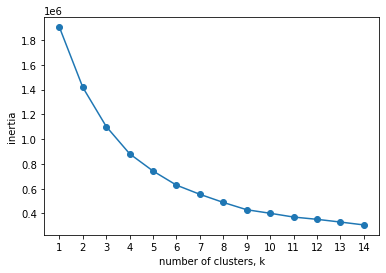

In [17]:
#Find number of clusters using inertia

from sklearn.cluster import KMeans

ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_res)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


Its hard to find the "elbow" of this plot, but it looks like it could be around 4-6 clusters.  This is the elbow method of finding the ideal number of clusters based on inertia. 

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
labels = model.fit_predict(X_res)

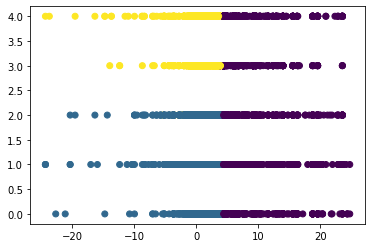

In [26]:
#Visualize the customer labels for quantity vs. unit price. 
import matplotlib.pyplot as plt
xs = X_res[:,0]
ys = X_res[:,4]
plt.scatter(xs, ys, c=labels)
plt.show()

This seems to cluster consumers into quantity and unit price quite well. CLusters are very distinct. 

 Perform PCA to find intrinsic dimension of the dataset. 

In [30]:
from sklearn.decomposition import PCA

In [32]:
pca= PCA()

In [33]:
pca.fit(X_res)

PCA()

In [34]:
features = range(pca.n_components_)

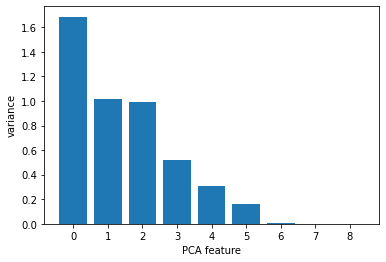

In [35]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

From the above graph, it looks like the intrinsic dimension of the dataset is 3 or 4. 

In [36]:
# Perform Dimension Reduction with PCA
pca = PCA(n_components=3)
pca.fit(X_res)

PCA(n_components=3)

In [37]:
transformed = pca.transform(X_res)
print(transformed.shape)

(406641, 3)


In [39]:
model = KMeans(n_clusters=4)
labels = model.fit_predict(transformed)

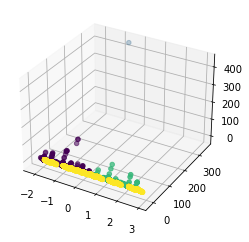

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs=transformed[:,0]
ys=transformed[:,1]
zs = transformed[:,2]
ax.scatter(xs,ys,zs,c=labels)
plt.show()

# Question 5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [48]:
y.head()

0    17850.0
1    17850.0
2    17850.0
3    17850.0
4    17850.0
Name: CustomerID, dtype: float64

In [50]:
y.nunique()

4372

In [ ]:
#There are 4372 customer id's, which is too many for hierarchical clustering. 

In [74]:
#Take a chunk of the dataset
X_chunk = transformed[:40]

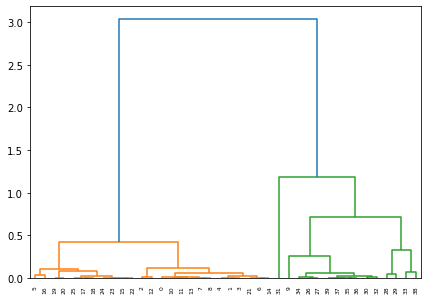

In [84]:
#get a dendrogram for the section of the dataset

from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(X_chunk, 'ward')

plt.figure(figsize=(7,5))

dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)

plt.show()

The dataset is way too large for hierarchical clustering (with way too many customer_ids).  So, I only looked at part of the dataset for the above dendrogram. From the above dendrogram, it looks like 3 clusters would be best. You can tell that by comparing the heights of the linkages.  

# Question 6.	Compare the results of 4 and 5. Which approach do you think is best? Why? 

I think that Kmeans clustering is much better for this problem because of the size of the dataset.  The size is very large in this case and there are too many customer ids (labels), so you have to take a subset of the data to get a dendrogram.  I only took the first 40 samples of my dataset to get the above dendrogram which isn't good in practice because they aren't random samples from the dataset.  Even if they are random, it is still not as good of a method as KMeans where you can take the whole dataset into account.  